# 1. Introduction
#### 1.1 Loading required libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

#### 1.2 Loading the dataset

In [3]:
df = pd.read_csv('cardio_train.csv')

# 2. Descriptive Analysis
#### 2.1 Data Exploration

In [3]:
first_rows = df.head()
print(first_rows)

    id      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  0.0  18393.0     2.0   168.0    62.0  110.0     80          1.0   1.0   
1  1.0  20228.0     1.0   156.0    85.0  140.0     90          3.0   1.0   
2  2.0  18857.0     1.0   165.0    64.0  130.0     70          3.0   1.0   
3  3.0  17623.0     2.0   169.0    82.0  150.0    100          1.0   1.0   
4  4.0  17474.0     1.0   156.0    56.0  100.0     60          1.0   1.0   

   smoke  alco  active  cardio  
0      0   0.0       1     0.0  
1      0   0.0       1     1.0  
2      0   0.0       0     1.0  
3      0   0.0       1     1.0  
4      0   0.0       0     0.0  


In [4]:
df['cardio'].value_counts()

cardio
0.0    35017
1.0    34978
Name: count, dtype: int64

In [4]:
info = df.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69996 non-null  float64
 1   age          69998 non-null  float64
 2   gender       69998 non-null  float64
 3   height       69998 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        69996 non-null  float64
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  69999 non-null  float64
 8   gluc         69999 non-null  float64
 9   smoke        70000 non-null  int64  
 10  alco         69998 non-null  float64
 11  active       70000 non-null  int64  
 12  cardio       69995 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 6.9 MB
None


In [5]:
descriptive_stats = df.describe()
(descriptive_stats)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69996.000000,69998.000000,69998.000000,69998.000000,70000.000000,69996.000000,70000.000000,69999.000000,69999.000000,70000.000000,69998.000000,70000.000000,69995.000000
mean,49970.694540,19468.881539,1.349581,164.359439,74.205690,128.817504,96.630414,1.366877,1.226460,0.088129,0.053759,0.803729,0.499721
std,28850.816112,2467.281138,0.476841,8.210134,14.395757,154.015803,188.472530,0.680254,0.572274,0.283484,0.225542,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25005.250000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50000.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74885.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 70000
Number of columns: 13


In [7]:
percent_missing = df.isnull().mean() * 100
print("\nPercent of missing values by columns:")
print(percent_missing)


Percent of missing values by columns:
id             0.005714
age            0.002857
gender         0.002857
height         0.002857
weight         0.000000
ap_hi          0.005714
ap_lo          0.000000
cholesterol    0.001429
gluc           0.001429
smoke          0.000000
alco           0.002857
active         0.000000
cardio         0.007143
dtype: float64


In [8]:
means = df.mean()
print("Means of the dataset:")
print(means)

Means of the dataset:
id             49970.694540
age            19468.881539
gender             1.349581
height           164.359439
weight            74.205690
ap_hi            128.817504
ap_lo             96.630414
cholesterol        1.366877
gluc               1.226460
smoke              0.088129
alco               0.053759
active             0.803729
cardio             0.499721
dtype: float64


In [9]:
medians = df.median()
print("\nMedians of the dataset:")
print(medians)


Medians of the dataset:
id             50000.5
age            19703.0
gender             1.0
height           165.0
weight            72.0
ap_hi            120.0
ap_lo             80.0
cholesterol        1.0
gluc               1.0
smoke              0.0
alco               0.0
active             1.0
cardio             0.0
dtype: float64


In [10]:
modes = df.mode().iloc[0]
print("\nModes of the dataset (first mode in case of multiple modes):")
print(modes)


Modes of the dataset (first mode in case of multiple modes):
id                 0.0
age            18236.0
gender             1.0
height           165.0
weight            65.0
ap_hi            120.0
ap_lo             80.0
cholesterol        1.0
gluc               1.0
smoke              0.0
alco               0.0
active             1.0
cardio             0.0
Name: 0, dtype: float64


In [11]:
variance = df.var()
print("\nVariance of the dataset:")
print(variance)


Variance of the dataset:
id             8.323696e+08
age            6.087476e+06
gender         2.273775e-01
height         6.740630e+01
weight         2.072378e+02
ap_hi          2.372087e+04
ap_lo          3.552189e+04
cholesterol    4.627452e-01
gluc           3.274972e-01
smoke          8.036307e-02
alco           5.086941e-02
active         1.577512e-01
cardio         2.500035e-01
dtype: float64


In [12]:
correlation_matrix = df.corr()
print(correlation_matrix)

                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003468  0.003487 -0.003033 -0.001946  0.003358   
age          0.003468  1.000000 -0.022826 -0.081533  0.053688  0.020762   
gender       0.003487 -0.022826  1.000000  0.499025  0.155399  0.006005   
height      -0.003033 -0.081533  0.499025  1.000000  0.290957  0.005484   
weight      -0.001946  0.053688  0.155399  0.290957  1.000000  0.030703   
ap_hi        0.003358  0.020762  0.006005  0.005484  0.030703  1.000000   
ap_lo       -0.002524  0.017647  0.015251  0.006147  0.043710  0.016085   
cholesterol  0.006064  0.154417 -0.035823 -0.050238  0.141766  0.023775   
gluc         0.002341  0.098697 -0.020486 -0.018599  0.106855  0.011839   
smoke       -0.003674 -0.047635  0.338132  0.187984  0.067780 -0.000926   
alco         0.001129 -0.029750  0.170903  0.094361  0.067070  0.001404   
active       0.003726 -0.009920  0.005876 -0.006557 -0.016867 -0.000032   
cardio       0.003824  0.

In [13]:
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_weight = df[(df['weight'] < lower_bound) | (df['weight'] > upper_bound)]

print("Outliers based on weight:")
print(outliers_weight)

print(f"\nNumber of outliers detected based on weight: {len(outliers_weight)}")

Outliers based on weight:
            id      age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
15        24.0  16782.0     2.0   172.0   112.0  120.0     80          1.0   
62        81.0  20330.0     2.0   187.0   115.0  130.0     90          1.0   
83       114.0  19570.0     1.0   152.0   110.0  160.0     90          1.0   
196      267.0  22675.0     1.0   176.0   108.0  140.0     90          1.0   
267      366.0  17460.0     1.0   165.0   115.0  150.0    100          1.0   
...        ...      ...     ...     ...     ...    ...    ...          ...   
69873  99799.0  19736.0     2.0   188.0   108.0  130.0     80          2.0   
69946  99925.0  21333.0     1.0   164.0   115.0  130.0     80          1.0   
69947  99930.0  23305.0     2.0   172.0   113.0  110.0     80          1.0   
69981      NaN  17500.0     2.0   182.0   110.0  130.0     90          2.0   
69996  99995.0  22601.0     1.0   158.0   126.0  140.0     90          2.0   

       gluc  smoke  alco  active  car

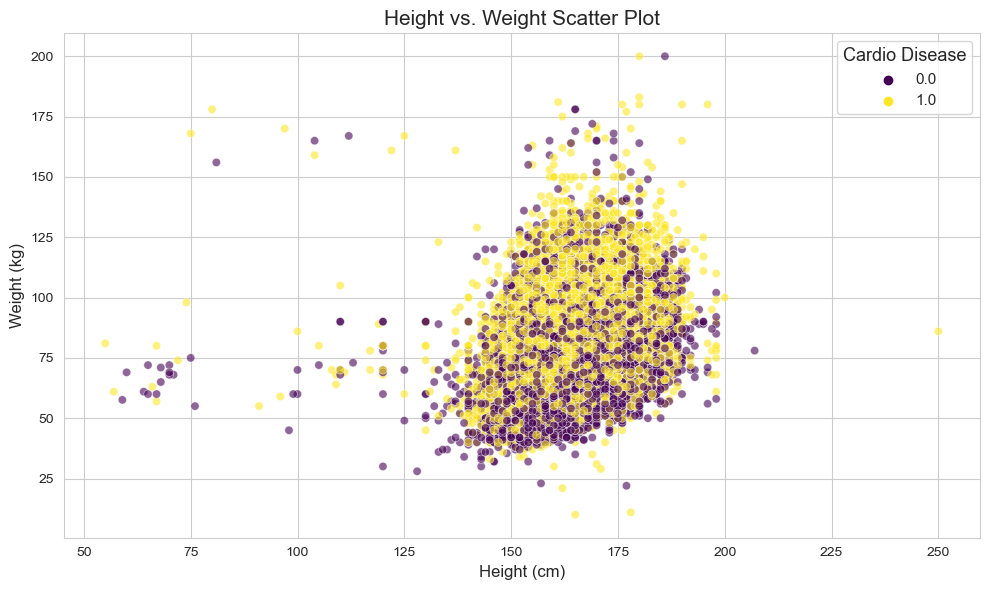

In [14]:
sns.set_style("whitegrid")

df['age_years'] = df['age'] / 365.25

plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='weight', data=df, hue='cardio', palette='viridis', alpha=0.6, edgecolor='w')
plt.title('Height vs. Weight Scatter Plot', fontsize=15)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)
plt.legend(title='Cardio Disease', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

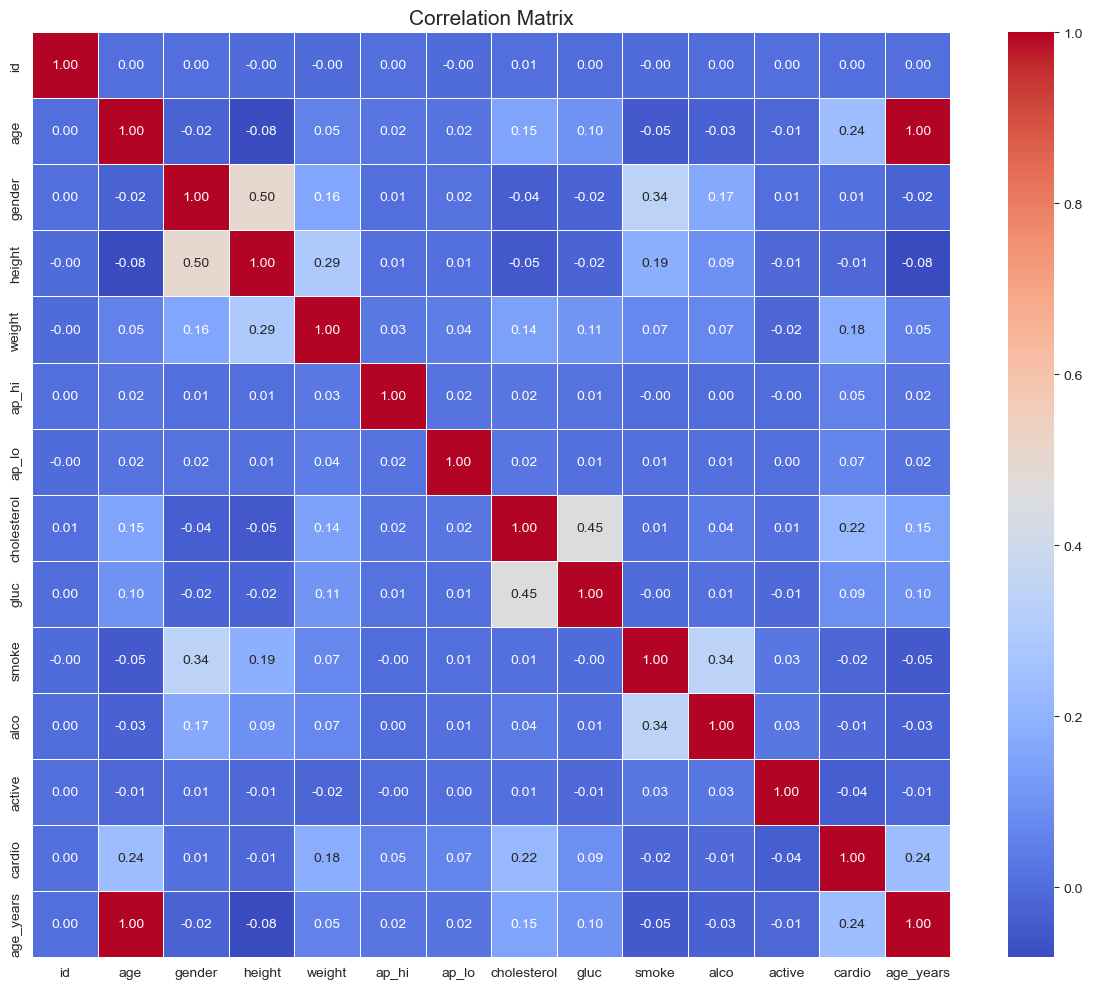

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\sidus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


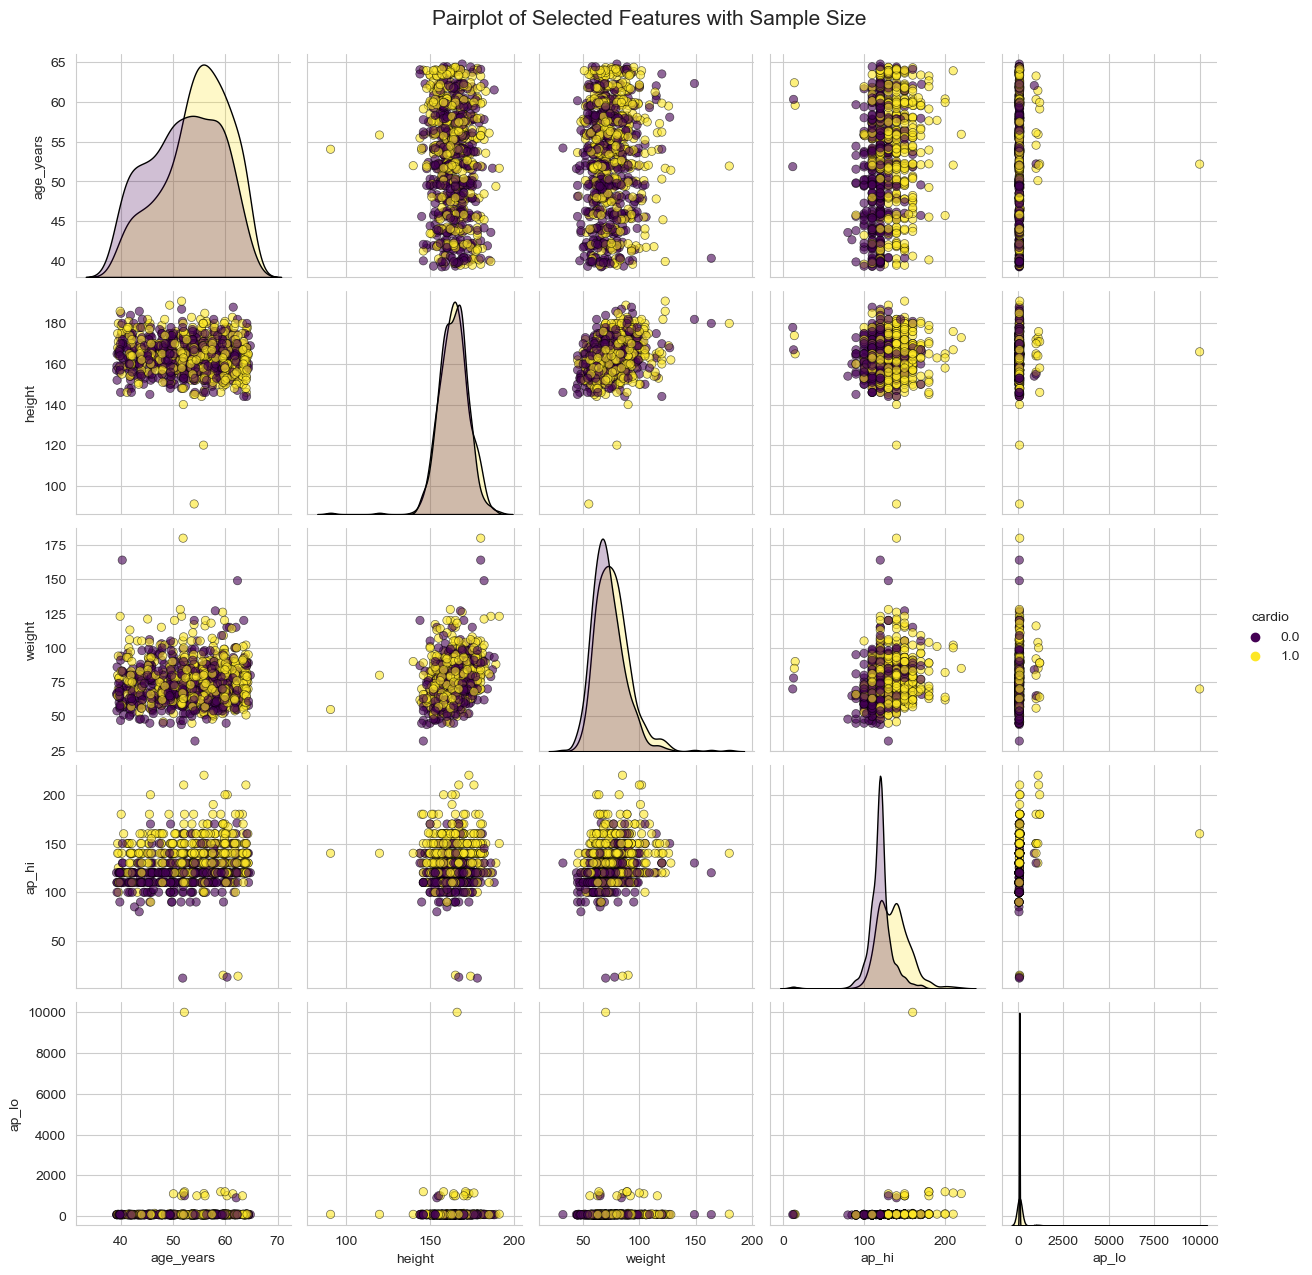

In [16]:
df_sample = df.sample(1000)
sns.pairplot(df_sample, hue='cardio', vars=['age_years', 'height', 'weight', 'ap_hi', 'ap_lo'],
             palette='viridis', plot_kws={'alpha':0.6, 'edgecolor':'k'}, diag_kws={'edgecolor':'k'})
plt.suptitle('Pairplot of Selected Features with Sample Size', fontsize=15, y=1.02)
plt.show()

#### 2.2 Preprocessing

In [17]:
missing_values = df.isnull().sum()
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [18]:
z_scores = np.abs(stats.zscore(df_imputed.select_dtypes(include=[np.number])))
threshold = 3
df_no_outliers = df_imputed[(z_scores < threshold).all(axis=1)]
new_shape = df_no_outliers.shape
(missing_values, new_shape)

(id             4
 age            2
 gender         2
 height         2
 weight         0
 ap_hi          4
 ap_lo          0
 cholesterol    1
 gluc           1
 smoke          0
 alco           2
 active         0
 cardio         5
 age_years      2
 dtype: int64,
 (55700, 14))

In [19]:
missing_values_after_imputation = df_imputed.isnull().sum()
missing_values_after_imputation

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
dtype: int64

In [20]:
rows_before = df.shape[0]

rows_after = df_no_outliers.shape[0]

rows_removed = rows_before - rows_after
rows_removed

14300

In [21]:
scaler = StandardScaler()

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(['id', 'cardio'])

df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

df_scaled.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0.0,-0.436063,1.364025,0.443426,-0.847873,-0.122180,-0.088238,-0.539327,-0.395723,-0.310879,-0.238354,0.494167,0.0,-0.436063
1,1.0,0.307676,-0.733124,-1.018193,0.749831,0.072607,-0.035180,2.400773,-0.395723,-0.310879,-0.238354,0.494167,1.0,0.307676
2,2.0,-0.248000,-0.733124,0.078021,-0.708942,0.007678,-0.141297,2.400773,-0.395723,-0.310879,-0.238354,-2.023607,1.0,-0.248000
3,3.0,-0.748149,1.364025,0.565228,0.541435,0.137536,0.017879,-0.539327,-0.395723,-0.310879,-0.238354,0.494167,1.0,-0.748149
4,4.0,-0.808540,-0.733124,-1.018193,-1.264666,-0.187109,-0.194356,-0.539327,-0.395723,-0.310879,-0.238354,-2.023607,0.0,-0.808540


In [22]:
categorical_cols_object = df.select_dtypes(include=['object']).columns.tolist()

categorical_cols_numerical = [col for col in df.select_dtypes(include=['int', 'float']).columns 
                              if df[col].nunique() < 10]

all_categorical_cols = list(set(categorical_cols_object + categorical_cols_numerical))

categorical_data = {}
for col in all_categorical_cols:
    unique_values = df[col].unique()
    categorical_data[col] = unique_values

categorical_data

{'alco': array([ 0.,  1., nan]),
 'gender': array([ 2.,  1., nan]),
 'smoke': array([0, 1], dtype=int64),
 'active': array([1, 0], dtype=int64),
 'cardio': array([ 0.,  1., nan]),
 'gluc': array([ 1.,  2.,  3., nan]),
 'cholesterol': array([ 1.,  3.,  2., nan])}

In [23]:
categorical_vars = ['cholesterol', 'alco', 'active', 'gluc', 'smoke', 'gender']

imputer = SimpleImputer(strategy='most_frequent')

df[categorical_vars] = imputer.fit_transform(df[categorical_vars])

df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)
df_encoded.head()

,id,age,height,weight,ap_hi,ap_lo,cardio,age_years,cholesterol_2.0,cholesterol_3.0,alco_1.0,active_1.0,gluc_2.0,gluc_3.0,smoke_1.0,gender_2.0
0,0.0,18393.0,168.0,62.0,110.0,80,0.0,50.357290,False,False,False,True,False,False,False,True
1,1.0,20228.0,156.0,85.0,140.0,90,1.0,55.381246,False,True,False,True,False,False,False,False
2,2.0,18857.0,165.0,64.0,130.0,70,1.0,51.627652,False,True,False,False,False,False,False,False
3,3.0,17623.0,169.0,82.0,150.0,100,1.0,48.249144,False,False,False,True,False,False,False,True
4,4.0,17474.0,156.0,56.0,100.0,60,0.0,47.841205,False,False,False,False,False,False,False,False


# 3. Feature Engineering
#### 3.1 Feature Selection

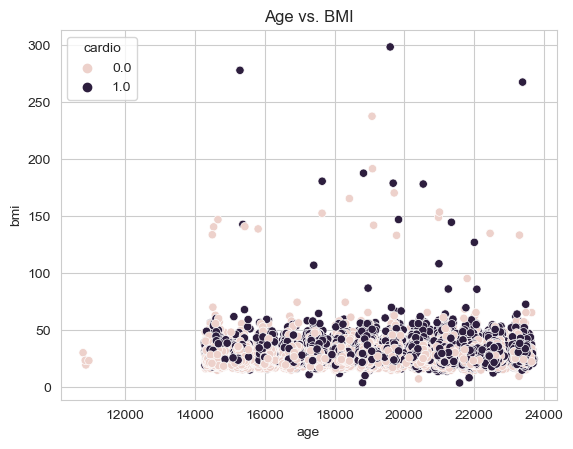

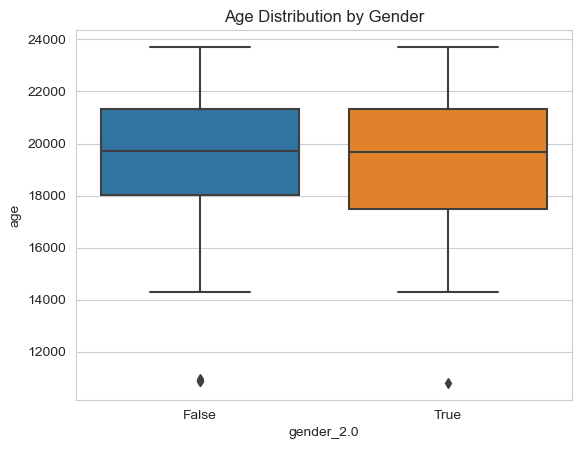

In [24]:
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

sns.scatterplot(x='age', y='bmi', data=df, hue='cardio')
plt.title('Age vs. BMI')
plt.show()

sns.boxplot(x='gender_2.0', y='age', data=df_encoded)
plt.title('Age Distribution by Gender')
plt.show()

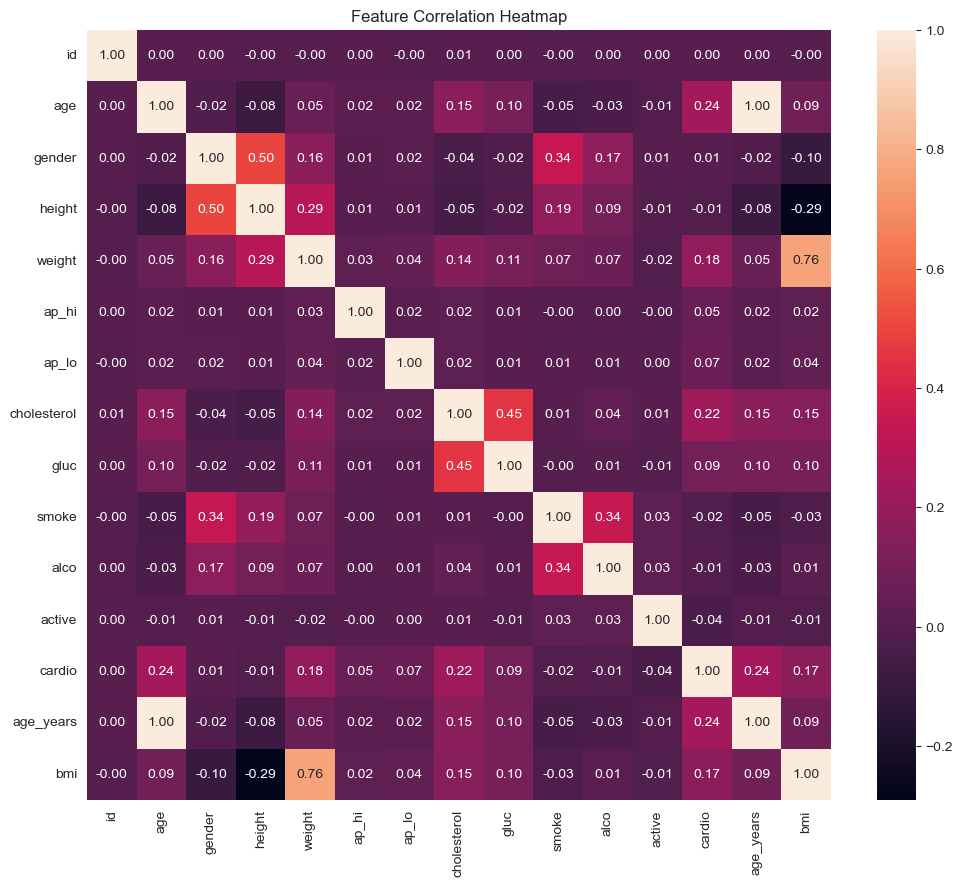

In [25]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

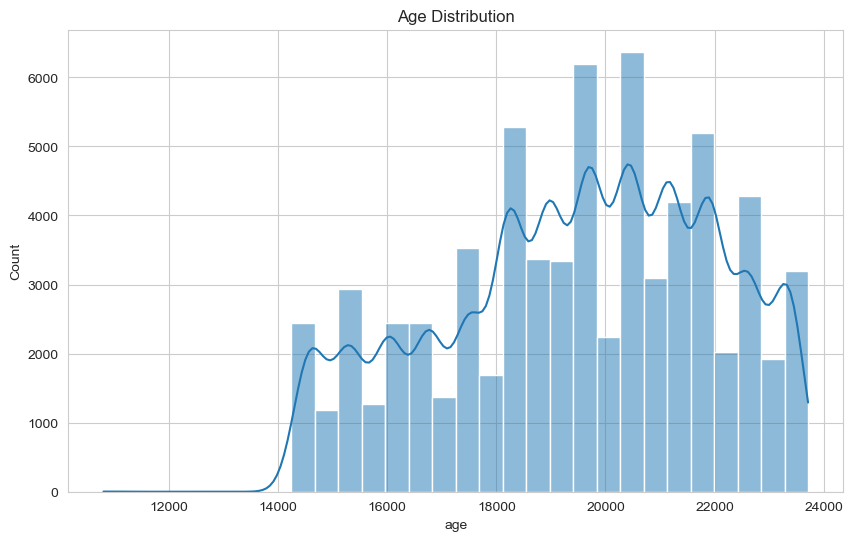

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

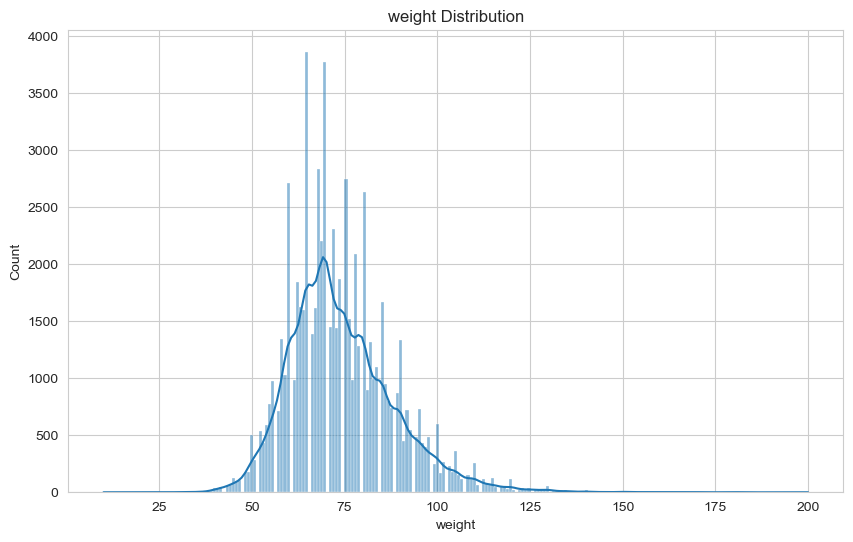

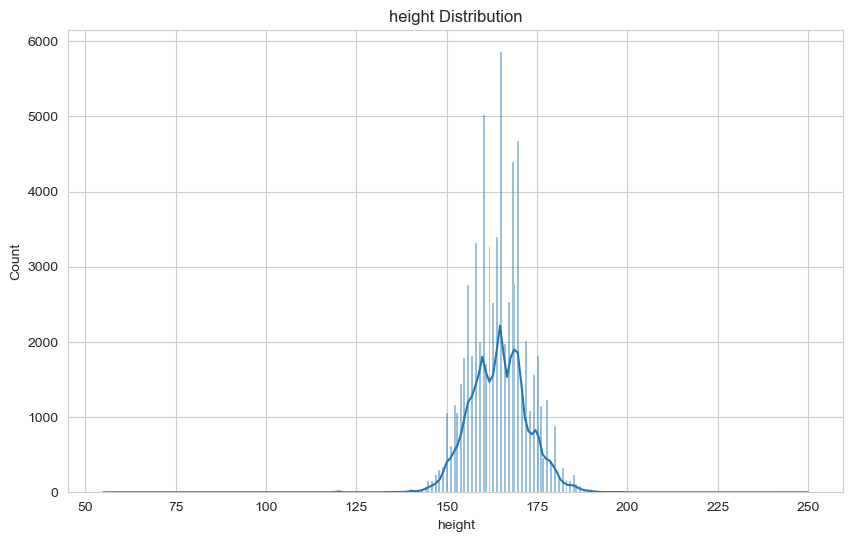

In [27]:
variables_to_plot = ['weight', 'height']

for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[variable], kde=True)
    plt.title(f'{variable} Distribution')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

In [28]:
df = df.drop(['id', 'age'], axis=1, errors='ignore')
column_list = df.columns.tolist()
print("List of columns:", column_list)

List of columns: ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi']


# 4. Model Selection
#### 4.1 Baseline Models

In [29]:
X = df.drop('cardio', axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
imputer_X = SimpleImputer(strategy='median')
X_imputed = imputer_X.fit_transform(X)
imputer_y = SimpleImputer(strategy='most_frequent')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', LogisticRegression(random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.7232142857142857
Precision: 0.7453464727045206
ROC-AUC: 0.7860004017154663


In [32]:
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_pipeline.fit(X_train, y_train)

y_pred_dt = dt_pipeline.predict(X_test)

In [33]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, dt_pipeline.predict_proba(X_test)[:, 1])

print(f'Decision Tree Accuracy: {accuracy_dt}')
print(f'Decision Tree Precision: {precision_dt}')
print(f'Decision Tree ROC-AUC: {roc_auc_dt}')

Decision Tree Accuracy: 0.6321428571428571
Decision Tree Precision: 0.6331902718168813
Decision Tree ROC-AUC: 0.6321180821429353


In [34]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)

y_pred_knn = knn_pipeline.predict(X_test)

In [35]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn_pipeline.predict_proba(X_test)[:, 1])

print(f'KNN Accuracy: {accuracy_knn}')
print(f'KNN Precision: {precision_knn}')
print(f'KNN ROC-AUC: {roc_auc_knn}')

KNN Accuracy: 0.6487142857142857
KNN Precision: 0.6540158870255958
KNN ROC-AUC: 0.6911917761554238


In [36]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)

In [37]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:, 1])

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Precision: {precision_rf}')
print(f'Random Forest ROC-AUC: {roc_auc_rf}')

Random Forest Accuracy: 0.7127857142857142
Random Forest Precision: 0.7160190668785209
Random Forest ROC-AUC: 0.7712579298192224


In [38]:
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))  # XGBoost model
])

xgb_pipeline.fit(X_train, y_train)

y_pred_xgb = xgb_pipeline.predict(X_test)

In [39]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_pipeline.predict_proba(X_test)[:, 1])

print(f'XGBoost Accuracy: {accuracy_xgb}')
print(f'XGBoost Precision: {precision_xgb}')
print(f'XGBoost ROC-AUC: {roc_auc_xgb}')

XGBoost Accuracy: 0.7367857142857143
XGBoost Precision: 0.757308584686775
XGBoost ROC-AUC: 0.796004533156179


In [40]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

[LightGBM] [Info] Number of positive: 27966, number of negative: 28034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 962
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499393 -> initscore=-0.002429
[LightGBM] [Info] Start training from score -0.002429


In [41]:
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_test, lgbm_model.predict_proba(X_test)[:, 1])

print(f'LightGBM Accuracy: {accuracy_lgbm}')
print(f'LightGBM Precision: {precision_lgbm}')
print(f'LightGBM ROC-AUC: {roc_auc_lgbm}')

LightGBM Accuracy: 0.7405
LightGBM Precision: 0.7612494201329828
LightGBM ROC-AUC: 0.8027593795377685


#### 4.2 Feature creation

In [42]:
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

In [43]:
df['bp_normal'] = ((df['ap_hi'] < 120) & (df['ap_lo'] < 80)).astype(int)
df['bp_elevated'] = ((df['ap_hi'] >= 120) & (df['ap_hi'] < 130) & (df['ap_lo'] < 80)).astype(int)
df['bp_high'] = ((df['ap_hi'] >= 130) & (df['ap_lo'] >= 80)).astype(int)
df['bp_hypertensive_crisis'] = ((df['ap_hi'] > 180) | (df['ap_lo'] > 120)).astype(int)

In [44]:
df['chol_normal'] = (df['cholesterol'] == 1).astype(int)
df['chol_above_normal'] = (df['cholesterol'] == 2).astype(int)
df['chol_well_above_normal'] = (df['cholesterol'] == 3).astype(int)

In [45]:
df['gluc_normal'] = (df['gluc'] == 1).astype(int)
df['gluc_above_normal'] = (df['gluc'] == 2).astype(int)
df['gluc_well_above_normal'] = (df['gluc'] == 3).astype(int)

In [46]:
df['combined_health_score'] = df['active'] + (1 - df['smoke']) + (1 - df['alco'])

In [47]:
X = df.drop([ 'cardio'], axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

new_features_csv = 'cardio_train_with_features.csv'
df.to_csv(new_features_csv, index=False)

print(f"The dataset with new features is saved to: {new_features_csv}")

The dataset with new features is saved to: cardio_train_with_features.csv


In [48]:
df = pd.read_csv('cardio_train_with_features.csv')
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df.drop(columns=['cardio']))
y = df['cardio']
if y.isnull().any():
    y = y.fillna(y.mode()[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
logreg_model = LogisticRegression(C=1, penalty='l2', max_iter=1000, random_state=42)
xgb_model = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lgbm_model = LGBMClassifier(random_state=42)  

logreg_pipeline = make_pipeline(StandardScaler(), logreg_model)
xgb_pipeline = make_pipeline(StandardScaler(), xgb_model)
rf_pipeline = make_pipeline(StandardScaler(), rf_model)
lgbm_pipeline = make_pipeline(StandardScaler(), lgbm_model)

In [50]:
logreg_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
lgbm_pipeline.fit(X_train, y_train)

models_evaluation = {
    'Logistic Regression': logreg_pipeline,
    'XGBoost': xgb_pipeline,
    'Random Forest': rf_pipeline,
    'LightGBM': lgbm_pipeline
}

[LightGBM] [Info] Number of positive: 27966, number of negative: 28034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499393 -> initscore=-0.002429
[LightGBM] [Info] Start training from score -0.002429


In [51]:
for model_name, model_pipeline in models_evaluation.items():
    y_pred = model_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model_pipeline.predict_proba(X_test)[:, 1])
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}\n")

Logistic Regression Performance:
Accuracy: 0.7325
Precision: 0.7629
ROC-AUC: 0.7851

XGBoost Performance:
Accuracy: 0.7384
Precision: 0.7555
ROC-AUC: 0.8040

Random Forest Performance:
Accuracy: 0.7084
Precision: 0.7112
ROC-AUC: 0.7684

LightGBM Performance:
Accuracy: 0.7404
Precision: 0.7594
ROC-AUC: 0.8028



# 5. Hyperparameter Tuning

In [52]:
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best ROC-AUC score:", grid_search.best_score_)

optimized_logreg = grid_search.best_estimator_
y_pred_optimized = optimized_logreg.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'classifier__C': 100, 'classifier__penalty': 'l2'}
Best ROC-AUC score: 0.7811807502506667


C:\Users\sidus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sidus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sidus\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sidus\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit

In [53]:
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
optimized_precision = precision_score(y_test, y_pred_optimized)
optimized_roc_auc = roc_auc_score(y_test, optimized_logreg.predict_proba(X_test)[:, 1])

print(f"Optimized Logistic Regression Accuracy: {optimized_accuracy}")
print(f"Optimized Logistic Regression Precision: {optimized_precision}")
print(f"Optimized Logistic Regression ROC-AUC: {optimized_roc_auc}")

Optimized Logistic Regression Accuracy: 0.7325
Optimized Logistic Regression Precision: 0.7629164654756156
Optimized Logistic Regression ROC-AUC: 0.785119899127867


In [54]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30], 
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4] 
}

grid_search_rf = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters:", grid_search_rf.best_params_)
print("Best ROC-AUC score:", grid_search_rf.best_score_)

optimized_rf = grid_search_rf.best_estimator_
y_pred_optimized_rf = optimized_rf.predict(X_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best ROC-AUC score: 0.8004104821546104


In [55]:
optimized_accuracy_rf = accuracy_score(y_test, y_pred_optimized_rf)
optimized_precision_rf = precision_score(y_test, y_pred_optimized_rf)
optimized_roc_auc_rf = roc_auc_score(y_test, optimized_rf.predict_proba(X_test)[:, 1])

print(f"Optimized Random Forest Accuracy: {optimized_accuracy_rf}")
print(f"Optimized Random Forest Precision: {optimized_precision_rf}")
print(f"Optimized Random Forest ROC-AUC: {optimized_roc_auc_rf}")

Optimized Random Forest Accuracy: 0.7375714285714285
Optimized Random Forest Precision: 0.7661033163265306
Optimized Random Forest ROC-AUC: 0.8021926737907149


In [56]:
xgb_pipeline = Pipeline([
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.01, 0.1]
}

grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print(f"XGBoost Best Params: {best_params_xgb}, Best Score: {best_score_xgb}")

XGBoost Best Params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}, Best Score: 0.7356785714285714


In [57]:
optimized_xgb_model = XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

optimized_xgb_model.fit(X_train, y_train)

y_pred_optimized_xgb = optimized_xgb_model.predict(X_test)
optimized_accuracy_xgb = accuracy_score(y_test, y_pred_optimized_xgb)
optimized_precision_xgb = precision_score(y_test, y_pred_optimized_xgb)
optimized_roc_auc_xgb = roc_auc_score(y_test, optimized_xgb_model.predict_proba(X_test)[:, 1])

print(f"Optimized XGBoost Accuracy: {optimized_accuracy_xgb}")
print(f"Optimized XGBoost Precision: {optimized_precision_xgb}")
print(f"Optimized XGBoost ROC-AUC: {optimized_roc_auc_xgb}")

Optimized XGBoost Accuracy: 0.7383571428571428
Optimized XGBoost Precision: 0.7554538520213577
Optimized XGBoost ROC-AUC: 0.8039863015107636


In [58]:
lgbm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LGBMClassifier(random_state=42))
])

param_grid_lgbm = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__num_leaves': [31, 62, 127],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search_lgbm = GridSearchCV(lgbm_pipeline, param_grid_lgbm, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search_lgbm.fit(X_train, y_train)

print("Best parameters:", grid_search_lgbm.best_params_)
print("Best ROC-AUC score:", grid_search_lgbm.best_score_)

optimized_lgbm = grid_search_lgbm.best_estimator_
y_pred_optimized_lgbm = optimized_lgbm.predict(X_test)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[LightGBM] [Info] Number of positive: 27966, number of negative: 28034
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499393 -> initscore=-0.002429
[LightGBM] [Info] Start training from score -0.002429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [59]:
optimized_accuracy_lgbm = accuracy_score(y_test, y_pred_optimized_lgbm)
optimized_precision_lgbm = precision_score(y_test, y_pred_optimized_lgbm)
optimized_roc_auc_lgbm = roc_auc_score(y_test, optimized_lgbm.predict_proba(X_test)[:, 1])

print(f"Optimized LightGBM Accuracy: {optimized_accuracy_lgbm}")
print(f"Optimized LightGBM Precision: {optimized_precision_lgbm}")
print(f"Optimized LightGBM ROC-AUC: {optimized_roc_auc_lgbm}")

Optimized LightGBM Accuracy: 0.7400714285714286
Optimized LightGBM Precision: 0.7603025158203427
Optimized LightGBM ROC-AUC: 0.8041085365638625


# 6. Final Model Selection

In [65]:
data = {
    'Model': ['Random Forest', 'Random Forest', 'Random Forest',
              'XGBoost', 'XGBoost', 'XGBoost',
              'LightGBM', 'LightGBM', 'LightGBM',
              'Log Reg', 'Log Reg', 'Log Reg'],
    'Round': ['Baseline', 'Post-Feature Engineering', 'Post-Hyperparameter Tuning',
              'Baseline', 'Post-Feature Engineering', 'Post-Hyperparameter Tuning',
              'Baseline', 'Post-Feature Engineering', 'Post-Hyperparameter Tuning',
              'Baseline', 'Post-Feature Engineering', 'Post-Hyperparameter Tuning'],
    'Accuracy': [0.708, 0.708, 0.737,
                 0.736, 0.738, 0.738,
                 0.740, 0.740, 0.740,
                 0.723, 0.732, 0.732],
    'Precision': [0.711, 0.711, 0.766,
                 0.757, 0.755, 0.759,
                 0.761, 0.759, 0.760,
                 0.745, 0.762, 0.762],
    'ROC-AUC': [0.768, 0.768, 0.802,
                 0.796, 0.804, 0.803,
                 0.802, 0.802, 0.804,
                 0.786, 0.785, 0.785]
}

dftab = pd.DataFrame(data)
print(dftab)

            Model                       Round  Accuracy  Precision  ROC-AUC
0   Random Forest                    Baseline     0.708      0.711    0.768
1   Random Forest    Post-Feature Engineering     0.708      0.711    0.768
2   Random Forest  Post-Hyperparameter Tuning     0.737      0.766    0.802
3         XGBoost                    Baseline     0.736      0.757    0.796
4         XGBoost    Post-Feature Engineering     0.738      0.755    0.804
5         XGBoost  Post-Hyperparameter Tuning     0.738      0.759    0.803
6        LightGBM                    Baseline     0.740      0.761    0.802
7        LightGBM    Post-Feature Engineering     0.740      0.759    0.802
8        LightGBM  Post-Hyperparameter Tuning     0.740      0.760    0.804
9         Log Reg                    Baseline     0.723      0.745    0.786
10        Log Reg    Post-Feature Engineering     0.732      0.762    0.785
11        Log Reg  Post-Hyperparameter Tuning     0.732      0.762    0.785


- Observations from the Table:
- Random Forest showed improvement after hyperparameter tuning, with noticeable gains in both Precision and ROC-AUC.
- XGBoost also displayed improvement after hyperparameter tuning but to a lesser extent compared to Random Forest.
- LightGBM maintained consistent performance across all rounds, indicating its robustness to the dataset with slight improvement   in precision after hyperparameter tuning.
- Logistic Regression displayed a significant increase in performance after feature engineering, with accuracy increasing from    baseline and remaining stable through to hyperparameter tuning.

- Recommendations:
- Choosing the Best Model: Based on the table, LightGBM appears to offer the best combination of accuracy and ROC-AUC post-tuning, making it a strong candidate for the final model.
- Further Improvement: We might explore more granular hyperparameter tuning for LightGBM or XGBoost, as they showed the best performance. We could also experiment with advanced feature engineering techniques or ensemble methods to see if there's a significant performance boost.
- Model Interpretability: The interpretability of the model is a crucial aspect in healthcare applications, Logistic Regression might still be considered due to the ease of understanding its decision process, despite it not having the absolute highest metrics.

- Based on the table provided and considering the performance metrics across different rounds (Baseline, Post-Feature    
  Engineering, and Post-Hyperparameter Tuning), 
- We would select LightGBM as the model of choice for the following reasons:
- Consistently High Performance
- Slight Improvement with Complexity
- Efficiency and Scalability
- Feature Importance and Interpretability
- Hyperparameter Sensitivity
- Balanced Precision and ROC-AUC

- Conclusion: Given LightGBM's strong and stable performance across different metrics, along with its computational benefits and   moderate interpretability, it stands out as a solid choice for deployment as such we decide to go with this model for    deployment. 